## Heart Disease Prediction

In [1]:
import pandas as pd

# Loading the data
data = pd.read_csv('heart.csv')

# Display the first few rows of the dataframe
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [2]:
data.shape

(1025, 14)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

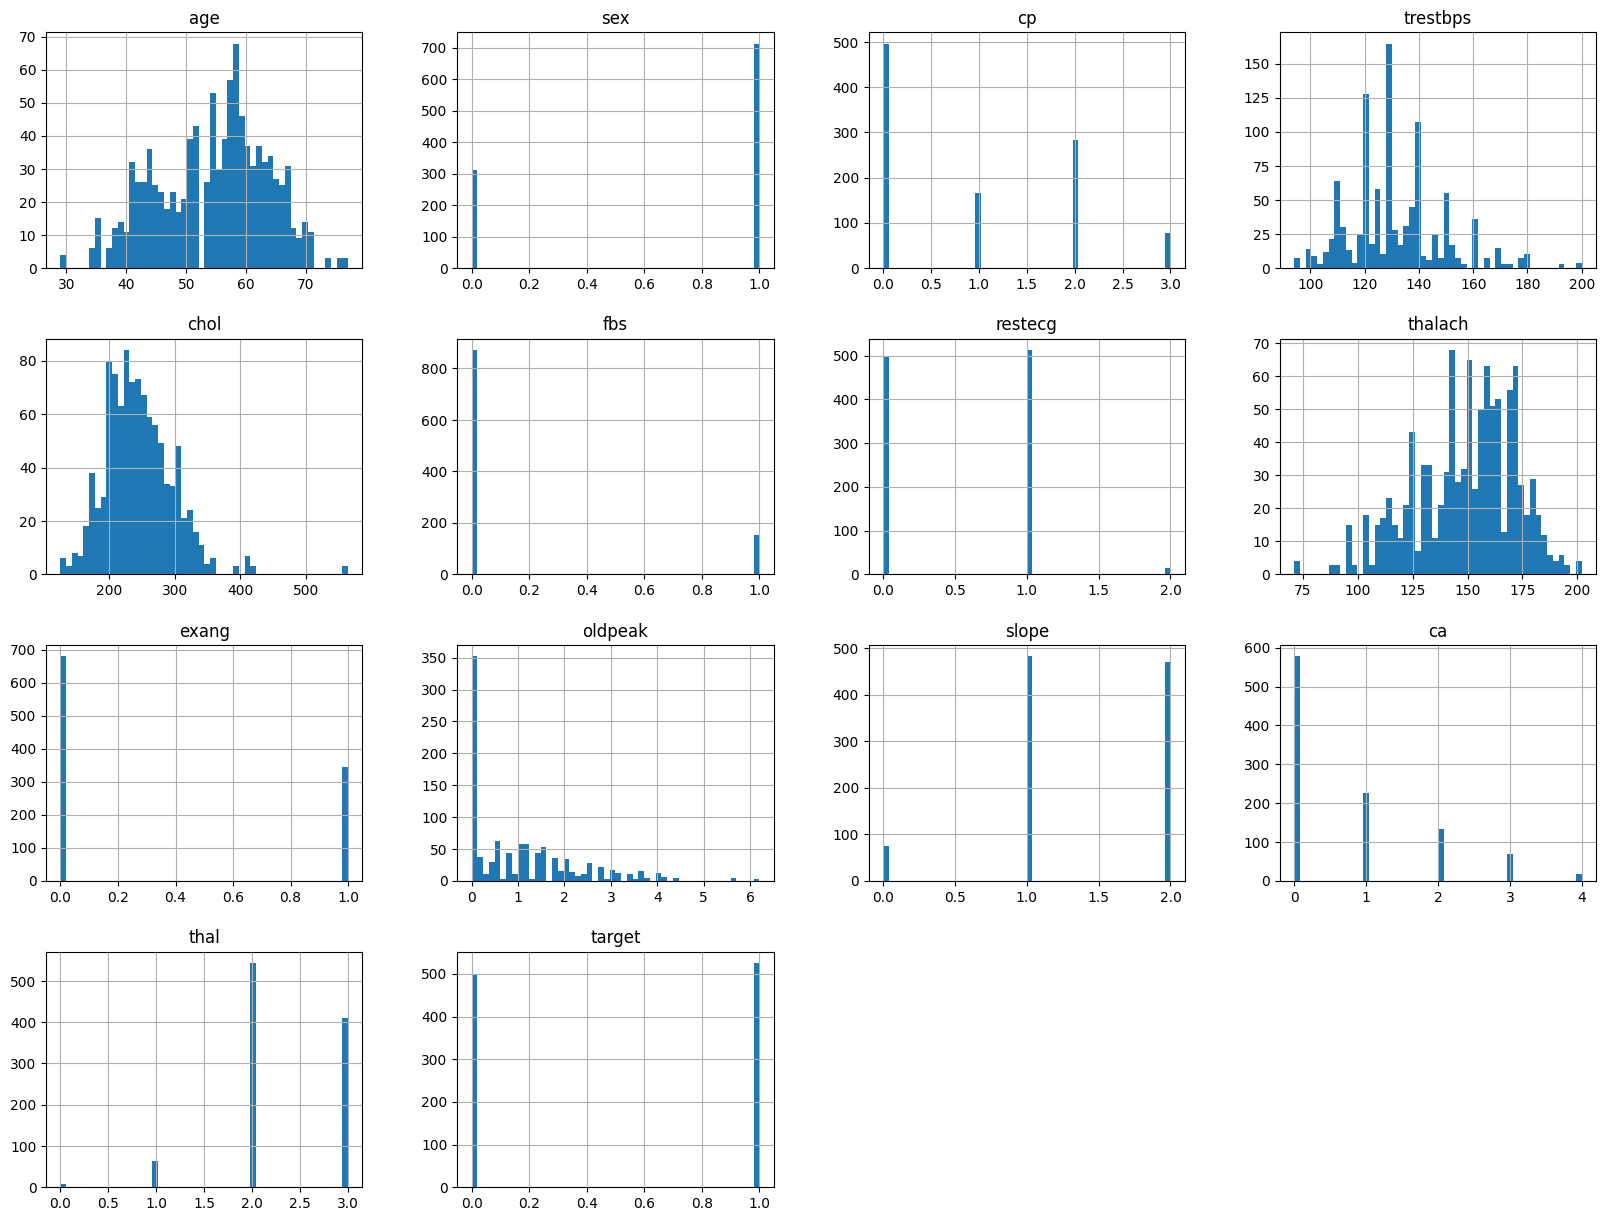

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))

## Looking for Correlations

In [6]:
corr_matrix = data.corr()

In [7]:
corr_matrix['target'].sort_values(ascending=False)

target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64

## Processing Data:

In [8]:
#Splitting data as feautures and target value
Features = data.iloc[:, :-1]  # All columns except the last one
Target = data.iloc[:, -1]     # The last column

print("Features:")
print(Features.head())
print("Target:")
print(Target.head())

Features:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  
0   2     3  
1   0     3  
2   0     3  
3   1     3  
4   3     2  
Target:
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


In [9]:
# Splitting desrired data into train set and test set
from sklearn.model_selection import train_test_split
train_Features, test_Features , train_target , test_target = train_test_split(Features, Target, test_size=0.2, random_state=42)

In [10]:
print("Training Features Shape:", train_Features.shape)
print("Testing Features Shape:", test_Features.shape)
print("Training Target Shape:", train_target.shape)
print("Testing Target Shape:", test_target.shape)

Training Features Shape: (820, 13)
Testing Features Shape: (205, 13)
Training Target Shape: (820,)
Testing Target Shape: (205,)


In [11]:
# Normalize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(train_Features)
X_test = scaler.transform(test_Features)

In [12]:
print("First element of train_Features after scaling:")
print(X_train[0])

First element of train_Features after scaling:
[-0.58584022  0.65465367  1.008275   -0.77945357 -1.93503098 -0.41403934
 -0.9837419  -1.01909426 -0.72594894 -0.21066121  1.00526437  2.17169136
 -0.54519316]


In [13]:
# Print the first element of test_target
print("First element of test_target:")
print(train_target.iloc[0])  

First element of test_target:
0


## Build a network

In [14]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Input(shape=(train_Features.shape[1],)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Train the model
history = model.fit(X_train, train_target, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6913 - loss: 0.6578 - val_accuracy: 0.7134 - val_loss: 0.5992
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8021 - loss: 0.5321 - val_accuracy: 0.7500 - val_loss: 0.5149
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7921 - loss: 0.4341 - val_accuracy: 0.7378 - val_loss: 0.4696
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8209 - loss: 0.3501 - val_accuracy: 0.7805 - val_loss: 0.4507
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8629 - loss: 0.3082 - val_accuracy: 0.7927 - val_loss: 0.4375
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8723 - loss: 0.2946 - val_accuracy: 0.7988 - val_loss: 0.4380
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9079 - loss: 0.2693 - val_accuracy: 0.8232 - val_loss: 0.4327
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9013 - loss: 0.2725 - val_accuracy: 0.8171 - val_loss:

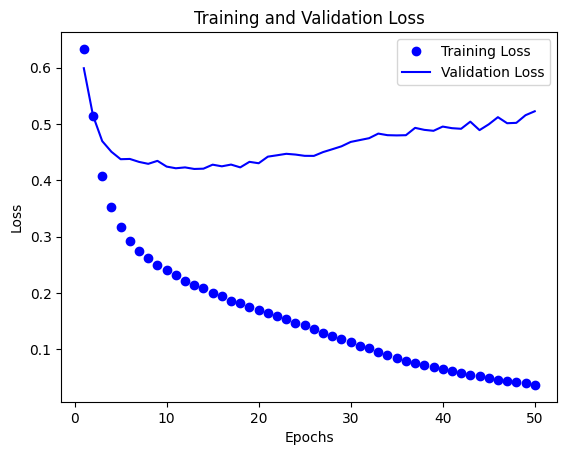

In [18]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')  
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')  
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

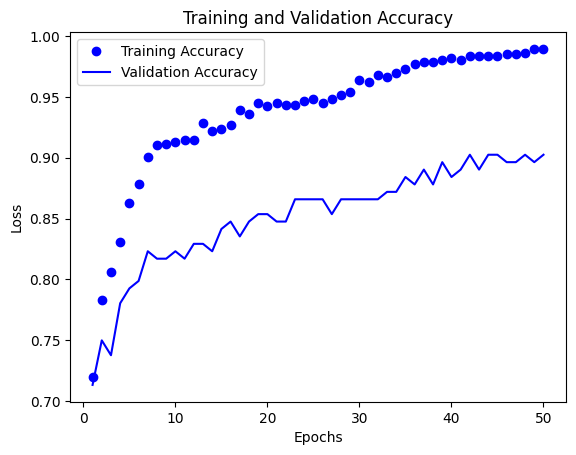

In [19]:
# Plotting the training and validation accuracy
import matplotlib.pyplot as plt

history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')  
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')  
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evalute the model and predict using the model

In [20]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, test_target)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8786 - loss: 0.6553 
Test Loss: 0.5559
Test Accuracy: 0.8927


In [21]:
import numpy as np

predicted_probability = model.predict(X_test)

# Print the predictions based on the threshold of 0.5
for prob in predicted_probability:
    if prob > 0.5:
        print("Yes! Patient is predicted to be suffering from heart disease.")
    else:
        print("No! Patient is predicted not to be suffering from heart disease.")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Yes! Patient is predicted to be suffering from heart disease.
Yes! Patient is predicted to be suffering from heart disease.
No! Patient is predicted not to be suffering from heart disease.
Yes! Patient is predicted to be suffering from heart disease.
No! Patient is predicted not to be suffering from heart disease.
No! Patient is predicted not to be suffering from heart disease.
No! Patient is predicted not to be suffering from heart disease.
No! Patient is predicted not to be suffering from heart disease.
Yes! Patient is predicted to be suffering from heart disease.
No! Patient is predicted not to be suffering from heart disease.
Yes! Patient is predicted to be suffering from heart disease.
No! Patient is predicted not to be suffering from heart disease.
Yes! Patient is predicted to be suffering from heart disease.
Yes! Patient is predicted to be suffering from heart disease.
No! Patient is predicted not to be suffering from heart disease.
No! Pati

In [22]:
test_target

527    1
359    1
447    0
31     1
621    0
      ..
832    1
796    1
644    1
404    0
842    0
Name: target, Length: 205, dtype: int64